## Import the useful library and the dataset

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel("../Datasets/Dry_Bean_Dataset.xlsx")
#df.head()

In [65]:
X = df.drop(columns=['Class']).values
y = df['Class'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)


## Preprocess data by centering the variables and dividing them by their standard deviation.

In [66]:
# we use sklearn to prerocess
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(Xtrain)
#X_std.shape

## My algorithm to perform PCA

In [68]:
def my_PCA(X_std, k):
    """
    X: dataframe
        dataframe with n observation and p features, assumed to be already standardized (nxp)
    k: int
        number of principal components we want to project on
    output: array-shape
        return the "projection matrix": this is a (p x k) matrix that is used to projecs a dataset of n observations and p features
        to a dataset with n observations and k feature; in particular, the "k most imporant" features of the initial dataset.
        (important according to "preserving varianca" paradigma)
        Remark:
        to actually projects, we have to compute the dot product between the initial nxp dataset and the output (pxk) matrix of this function my_PCA.
        Example:
        X = my_initial_nxp_dataset #assume X is standardized
        find_best_k(X) #used to find the best k, call it k_bar
        proj_mtrx = my_PCA(X, k_bar)
        proj_dataset = X.dot(proj_mtrx) # this is the entire initial dataset projected onto the k PCs, so it is a nxk matrix.
    """
  
    cov_mat = np.cov(X_std.T)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    #print('eig_val:', eig_vals)
    #print('eig_vecs:', eig_vecs)

    sorted_indices = np.argsort(eig_vals)[::-1]
    sorted_eigvecs = eig_vecs[:,sorted_indices]
    #print('sorted_indeces:', sorted_indices)
    #print('sorted_eigvec:', sorted_eigvecs)
    

    #num_features = X_std.shape[1]
    #print(num_features)
    explained_variance_ratio = eig_vals / np.sum(eig_vals)
    fidelity_variance_ratio = np.cumsum(explained_variance_ratio)
    
    top_k_eigvecs = sorted_eigvecs[:k]
    #print(top_k_eigvecs.shape)
    #print('top_k:', top_k_eigvecs)

    #print('shape', top_k_eigvecs.T.shape)

    return top_k_eigvecs.T

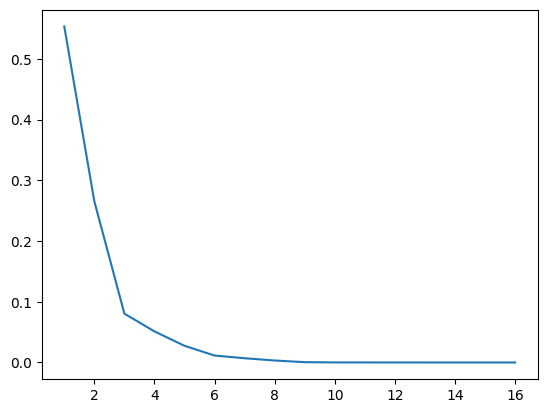

In [69]:
from matplotlib import pyplot as plt

def find_best_k(X_std):
    cov_mat = np.cov(X_std.T)

    eig_vals = np.linalg.eig(cov_mat)[0]

    lambdas = sorted(eig_vals, reverse=True)/np.sum(eig_vals)
    #print(lambdas)

    dim = [i for i in range(1,X_std.shape[1]+1)]

    plt.plot(dim, lambdas)


find_best_k(X_std)

In [17]:
"""
## check the leveles of y, and change it so that we can associate a color to each class
df['Class'].value_counts()

# create a dictionary to map categories to numbers
category_numbers = {category: num for num, category in enumerate(df['Class'].unique())}

# apply the mapping to the 'category' column using the map() function
df['Class'] = df['Class'].map(category_numbers)

y = df['Class'].values

"""

"\n## check the leveles of y, and change it so that we can associate a color to each class\ndf['Class'].value_counts()\n\n# create a dictionary to map categories to numbers\ncategory_numbers = {category: num for num, category in enumerate(df['Class'].unique())}\n\n# apply the mapping to the 'category' column using the map() function\ndf['Class'] = df['Class'].map(category_numbers)\n\ny = df['Class'].values\n\n"

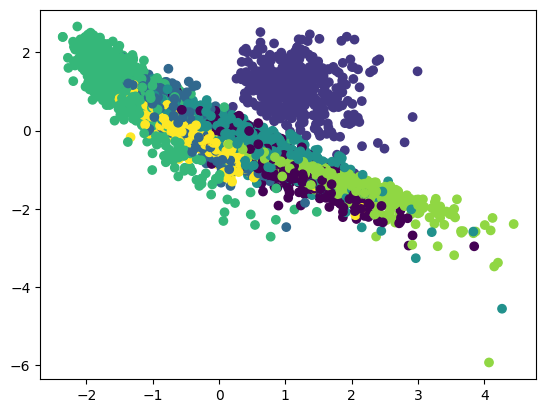

In [70]:
## Project the data (training set) in the first two principal components and color by class. Do it also for three principal components.
proj_to_2 = X_std.dot(my_PCA(X_std,2))

first_comp = [proj_to_2[i][0] for i in range(X_std.shape[0])]
second_comp = [proj_to_2[i][1] for i in range(X_std.shape[0])]

# Get the unique categories
unique_categories = np.unique(ytrain)

# Create an empty array to store the encoded values
encoded_array = np.empty_like(ytrain, dtype=int)

# Loop through each category and encode it
for i, category in enumerate(unique_categories):
    encoded_array[ytrain == category] = i

# apply the mapping to the 'category' column using the map() function
plt.scatter(first_comp,second_comp, c = encoded_array)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


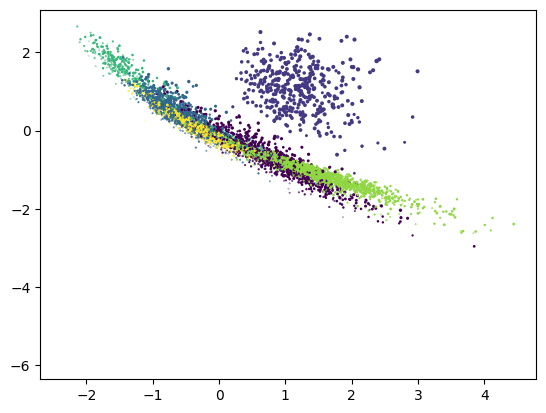

In [71]:
## Project the data (training set) in the first 3 principal components and color by class. Do it also for three principal components.
proj_to_3 = X_std.dot(my_PCA(X_std,3))

first_comp = [proj_to_3[i][0] for i in range(X_std.shape[0])]
second_comp = [proj_to_3[i][1] for i in range(X_std.shape[0])]
third_comp = [proj_to_3[i][2] for i in range(X_std.shape[0])]

# Get the unique categories
unique_categories = np.unique(ytrain)

# Create an empty array to store the encoded values
encoded_array = np.empty_like(ytrain, dtype=int)

# Loop through each category and encode it
for i, category in enumerate(unique_categories):
    encoded_array[ytrain == category] = i

plt.scatter(first_comp,second_comp, third_comp, c = encoded_array)

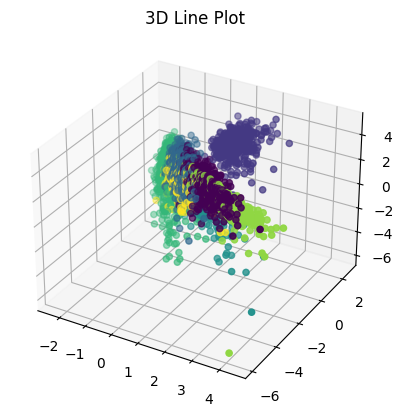

In [72]:
# create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Get the unique categories
unique_categories = np.unique(ytrain)

# Create an empty array to store the encoded values
encoded_array = np.empty_like(ytrain, dtype=int)

# Loop through each category and encode it
for i, category in enumerate(unique_categories):
    encoded_array[ytrain == category] = i

# plot the data
ax.scatter(first_comp, second_comp, third_comp, c = encoded_array)

# set the plot title and labels
ax.set_title('3D Line Plot')

# show the plot
plt.show()

## For an increasing number of principal components (1 to 16):
    – apply a multinomial logistic regression to learn a model on the training set (use sklearn.linar model.LogisticRegression).

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

for k in range(1,17):
    # Xtrain_proj is the train standardized dataset projected to k PC
    proj_mtrx = my_PCA(X_std, k)
    Xtrain_proj = X_std.dot(proj_mtrx)

    # fit a logistic regression using the dimension-reduced dataset Xtrain_proj (nxk instead of nxp, where p = 16)
    model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
    model.fit(Xtrain_proj,ytrain)

    #transfrom the test set "Xtest" with proj_mtrx: 
        # we need to standardized Xtest too.    
    scaler = StandardScaler()
    X_std_test = scaler.fit_transform(Xtest)

    Xtest_proj = X_std_test.dot(proj_mtrx) # Xtest_proj is the test set transformed with the matrix learned in the training set, called proj_mtrx

    # Make a prediction with the logistic model learned.
    yhat = model.predict(Xtest_proj)

    # Assess the quality of the predictions
    acc = accuracy_score(ytest, yhat)
    print(f'Accuracy for {k} components: ', acc)
    

Accuracy for 1 components:  0.5244215938303342
Accuracy for 2 components:  0.6246786632390745
Accuracy for 3 components:  0.7477047374219611


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 4 components:  0.8020565552699229


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 5 components:  0.8571428571428571


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 6 components:  0.9133308850532501


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy for 7 components:  0.9291222915901579
Accuracy for 8 components:  0.9298567756151304


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 9 components:  0.9302240176276166


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 10 components:  0.9302240176276166


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 11 components:  0.9309585016525891


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 12 components:  0.9313257436650753
Accuracy for 13 components:  0.9313257436650753


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Accuracy for 14 components:  0.9305912596401028


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 15 components:  0.9302240176276166
Accuracy for 16 components:  0.9302240176276166


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


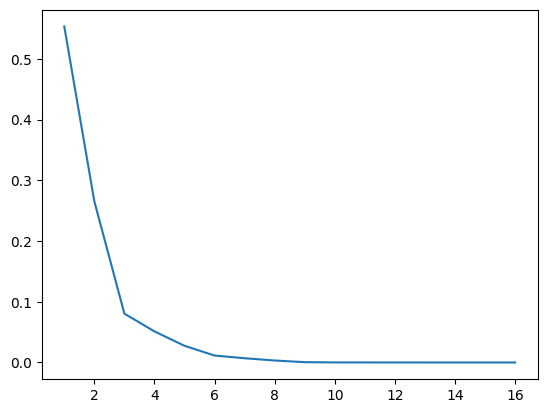

In [74]:
find_best_k(X_std) # si conferma che da 6 in giu, l accuracy non varia piu molto... infatti c'e un gomito a 3, ma poi un altro gomito a 6... dopo il 6, praticamente siamo stazionari

–Transform the test set with the matrix learned from the training set.
Make a prediction with the logistic model learned.
    –Assess the quality of the predictions and comment on the results.


In [53]:
proj_mtrx = my_PCA(X_std, 3)

proj_mtrx.shape

shape (16, 3)


(16, 3)

In [57]:
# Transform the test set with the matrix learned from the training set.
    # PCA is the matrix learned from the training set; it projects the initial nx16 dataset onto a space with only 3 feataures
    # so PCA is a nx3 matrix which gives us a nx3 matrix, when we take the dotproduct with the original nx16 matrix 
    # (this dot product is the last line in my_PCA function... actually my_PCA projects itself the data onto the k "most principal" component)

# these are my test data projected on to the 3 most important component (these 3 most PC are obtained from the training set)
projected_data = Xtest.dot(proj_mtrx) 

projected_data.shape

(2723, 3)

In [56]:
# Make a prediction with the logistic model learned.

yhat = model.predict(Xtest)
yhat

array(['SEKER', 'DERMASON', 'SEKER', ..., 'SIRA', 'DERMASON', 'SIRA'],
      dtype=object)

In [58]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, yhat)
print('Accuracy: ', acc)

Accuracy:  0.7014322438486963


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, yhat))

              precision    recall  f1-score   support

    BARBUNYA       0.61      0.55      0.58       256
      BOMBAY       1.00      1.00      1.00       100
        CALI       0.74      0.72      0.73       335
    DERMASON       0.81      0.87      0.84       728
       HOROZ       0.62      0.54      0.58       388
       SEKER       0.66      0.60      0.63       395
        SIRA       0.59      0.67      0.63       521

    accuracy                           0.70      2723
   macro avg       0.72      0.71      0.71      2723
weighted avg       0.70      0.70      0.70      2723



In [61]:
print(confusion_matrix(ytest, yhat))

[[142   0  68   0  43   0   3]
 [  0 100   0   0   0   0   0]
 [ 79   0 240   0  13   2   1]
 [  0   0   0 635   6  39  48]
 [  9   0  17  15 209   7 131]
 [  2   0   0  94   5 236  58]
 [  1   0   0  36  62  74 348]]
